Libraries:

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

Data Cleaning & Feature Engineering:

In [4]:
# Note: upload this file at run-time

data_raw = pd.read_csv('data_clean.csv')
#data_raw.columns

# remove for validation
data_clean = data_raw[data_raw['Health Status'] != "for validation"]
data_clean=data_clean.reset_index(drop=True)
data_clean.columns

Index(['phcaseno', 'Sex', 'Age', 'Nationality', 'Residence in the Philippines',
       'History of Travel / Exposure', 'Epi_Link', 'Date of Onset of Symptoms',
       'Date of Admission', 'Date of Lab Confirmation',
       ...
       'dis_myocarditis', 'dis_none', 'dis_permanent atrial fibrillation',
       'dis_prostatic cancer', 'dis_remnal disease',
       'dis_status post renal transplant', 'dis_systemic lupus erythematosus',
       'dis_with comorbid (not specified)', 'geo_address', 'disease_len_days'],
      dtype='object', length=109)

In [5]:
data_clean.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Epi_Link,Date of Onset of Symptoms,Date of Admission,Date of Lab Confirmation,...,dis_myocarditis,dis_none,dis_permanent atrial fibrillation,dis_prostatic cancer,dis_remnal disease,dis_status post renal transplant,dis_systemic lupus erythematosus,dis_with comorbid (not specified),geo_address,disease_len_days
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,Wife of PH2,2020-01-21 00:00:00-05:00,Sat Jan 25 00:00:00 EST 2020,Thu Jan 30 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...",53 days 23:00:00.000000000
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,Husband of PH1,2020-01-18 00:00:00-05:00,Sat Jan 25 00:00:00 EST 2020,Thu Jan 30 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...",14 days 00:00:00.000000000
2,PH00003,F,60,chinese,None,Yes (China),Traveled to Cebu and Bohol. Was already in Chi...,2020-01-21 00:00:00-05:00,Wed Jan 22 00:00:00 EST 2020,Thu Jan 30 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'public_building': 'Francisco Duque Hall', 'r...",53 days 23:00:00.000000000
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),NaN,2020-03-03 00:00:00-05:00,Fri Mar 06 00:00:00 EST 2020,Thu Mar 05 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{'hospital': 'University of the East - Ramon M...,15 days 23:00:00.000000000
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,Husband of PH6,2020-02-25 00:00:00-05:00,Thu Mar 05 00:00:00 EST 2020,Thu Mar 05 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{'hospital': 'Research Institute for Tropical ...,15 days 23:00:00.000000000


In [6]:
# explore data
#sns.pairplot(data_clean, hue="Health Status")

In [7]:
data_clean.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

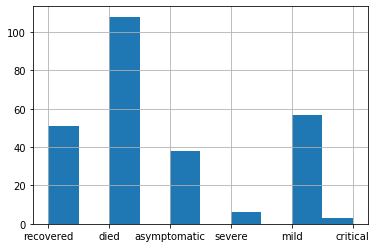

In [8]:
data_clean['Health Status'].hist()
data_numeric = data_clean.select_dtypes(include=['float', 'int64'])

In [9]:
data_numeric.columns[0:10]

Index(['Age', 'Latitude', 'Longitude', 'Residence Lat', 'symp_ body malaise',
       'symp_ colds', 'symp_ comorbidity', 'symp_ cough',
       'symp_ difficulty in breathing', 'symp_ dizziness'],
      dtype='object')

Clustering to define the target variable:

In [10]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=10, n_init=2)
    kmeans.fit(data_numeric)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

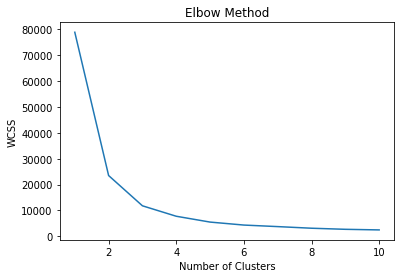

In [11]:
#Plot the elbow method to see if we found the optimal number of clusters
import matplotlib.pyplot as plt 

#fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(15,8))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

In [12]:
# Going to try with 6 clusters to start
schools_kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=6)
schools_cluster = schools_kmeans.fit_predict(data_numeric)

In [13]:
# see how this maps with HS
#schools_cluster 

In [14]:
import numpy as np
#np.array(data_clean['Health Status'])

def status_to_numeric(x):
    if x=='died':
        return 5
    if x=='critical':
        return 4
    if x=='severe':
        return 3
    if x=='mild':
        return 2
    if x=='asymptomatic':
        return 1
    if x=='recovered':
        return 0

In [15]:
data_clean['HealthStatusNUM'] = data_clean['Health Status'].apply(status_to_numeric)

In [16]:
data_clean['Cluster'] = pd.DataFrame(schools_cluster)

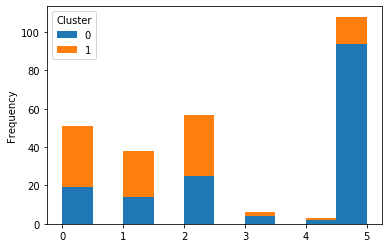

In [17]:
data_clean.pivot(columns='Cluster').HealthStatusNUM.plot(kind = 'hist', stacked=True)

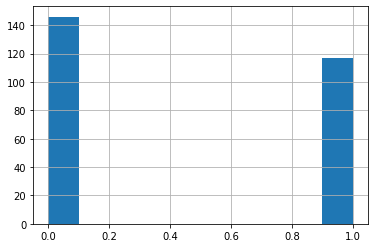

In [18]:
# recode to 2 categories

def health_status_binary(series):
    if series > 2:
        return 1
    else:
        return 0
    
data_clean['Health Status Binary'] = data_clean['HealthStatusNUM'].apply(health_status_binary)

data_clean['Health Status Binary'].hist()

feature transformations

In [19]:
# Sex -  M/F:
data_clean['Sex'] = pd.get_dummies(data_clean['Sex'])
data_clean['Sex'].value_counts() 

0    180
1     83
Name: Sex, dtype: int64

In [20]:
print(data_clean['Nationality'].value_counts() )

def nationality_recode(series):
    if series != 'filipino':
        return 'other'
    else: 
        return 'filipino'

data_clean['Nationality'] = data_clean['Nationality'].apply(nationality_recode)
data_clean['Nationality'] = pd.get_dummies(data_clean['Nationality'])
data_clean['Nationality'].value_counts() 

filipino              242
for validation         10
american                3
chinese                 3
british, uk             2
thai                    2
chinese, taiwanese      1
Name: Nationality, dtype: int64


1    242
0     21
Name: Nationality, dtype: int64

In [21]:
data_clean['History of Travel / Exposure'] = data_clean['History of Travel / Exposure'].isna()
data_clean['History of Travel / Exposure'] = pd.get_dummies(data_clean['History of Travel / Exposure'])
data_clean['History of Travel / Exposure'].value_counts() 

1    257
0      6
Name: History of Travel / Exposure, dtype: int64

In [22]:
# epi link cleaning
data_clean['Epi_Link'] = data_clean['Epi_Link'].isna()
data_clean['Epi_Link'] = pd.get_dummies(data_clean['Epi_Link'])
data_clean['Epi_Link'].value_counts() 

# better cleaning 


0    198
1     65
Name: Epi_Link, dtype: int64

In [23]:
# disease_len_days cleaning - extract # days

data_clean['disease_len_days'] = data_clean["disease_len_days"].str.split(" ", 1, expand=True)[0]

In [24]:
data = data_clean.drop(['Health Status', 'HealthStatusNUM', 'phcaseno','Residence in the Philippines', 'Date of Onset of Symptoms', 'Date of Admission', 'Date of Lab Confirmation', 'Date of Announcement to the Public', 'Admission / Consultation', 'Symptoms', 'other_disease', 'Status', 'Date of Final Status (recovered/expired)', 'Final Diagnosis', 'Age Group', 'Location', 'Location 1', 'Location 2', 'Residence Lat', 'Residence Long', 'geo_address'], axis=1)

# how to recode NaN
data = data.fillna(data.mean())

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Health Status Binary', axis=1), data['Health Status Binary'], test_size=0.20, random_state=0)

In [26]:
X_train

,Sex,Age,Nationality,History of Travel / Exposure,Epi_Link,Latitude,Longitude,symp_ body malaise,symp_ colds,symp_ comorbidity,...,dis_myocarditis,dis_none,dis_permanent atrial fibrillation,dis_prostatic cancer,dis_remnal disease,dis_status post renal transplant,dis_systemic lupus erythematosus,dis_with comorbid (not specified),disease_len_days,Cluster
191,0,46,1,1,0,14.622320,121.023899,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
44,0,27,1,1,1,14.559380,121.014535,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1
64,0,70,1,1,1,14.656208,121.040087,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
71,0,41,1,1,0,14.248590,121.067280,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1
188,1,67,1,1,0,14.615867,120.980991,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0,60,0,1,0,14.413478,121.043612,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
192,0,57,1,1,0,14.622320,121.023899,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
117,0,60,1,1,0,14.615867,120.980991,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
47,0,57,1,1,1,14.647837,121.045611,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0


In [27]:
# standardize the data
from sklearn import preprocessing 
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="mean")

standardize = preprocessing.StandardScaler()
X_train = standardize.fit_transform(imp.fit_transform(X_train))
X_test = standardize.fit_transform(imp.fit_transform(X_test))

Modeling:

In [28]:
# NAIVE BAYES:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [34]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm # overpredicts 1 class

Accuracy: 0.5094339622641509


array([[ 3, 26],
       [ 0, 24]])

In [30]:
# DECISION TREE:

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions)

In [31]:
cm

array([[29,  0],
       [ 6, 18]])

In [32]:
print("Accuracy:", metrics.accuracy_score(y_test, dtree_predictions))
dtree_model.score(X_test,  y_test)

Accuracy: 0.8867924528301887


0.8867924528301887

In [372]:
dtree_predictions

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0])

In [371]:
np.array(y_test)

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0])

In [373]:
# SVM: 

# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
cm

array([[28,  1],
       [ 7, 17]])

In [374]:
print(accuracy)

0.8490566037735849


In [35]:
# Logistic Regression
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


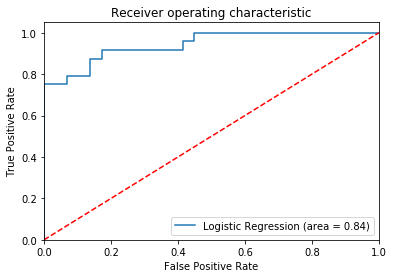

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [375]:
# KNN

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train) # optimize k
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy)
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions)

0.8113207547169812


In [45]:
# https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/
# https://shrikar.com/deep-learning-with-keras-and-python-for-multiclass-classification/
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

# new binary: https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/

# downgrade TensorFlow 1.14
#!pip install tensorflow==1.14

In [408]:
X_train.shape

(210, 90)

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
210/210 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.5143
Epoch 2/150
210/210 [==============================] - 0s 327us/step - loss: 0.6266 - accuracy: 0.6714
Epoch 3/150
210/210 [==============================] - 0s 262us/step - loss: 0.5865 - accuracy: 0.7429
Epoch 4/150
210/210 [==============================] - 0s 251us/step - loss: 0.5529 - accuracy: 0.8143
Epoch 5/150
210/210 [==============================] - 0s 234us/step - loss: 0.5206 - accuracy: 0.8286
Epoch 6/150
210/210 [==============================] - 0s 220us/step - loss: 0.4883 - accuracy: 0.8286
Epoch 7/150
210/210 [==============================] - 0s 228us/step - loss: 0.4560 - accuracy: 0.8333
Epoch 8/150
210/210 [==============================] - 0s 224us/step - loss: 0.4228 - accuracy: 0.8571
Epoch 9/150
210/210 [==============================] - 0s 235us/step - loss: 0.3898 - accuracy: 0.8762
Epoch 10/150
210/210 [==============================] - 0s 249us/step - los